In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [2]:
input_devices= pd.read_excel("input_clean.xlsx")
output = pd.read_excel("out.xlsx")
output.head()

,Ion,Iamb,ss,fT_max
0,9.384559e-08,4.943229e-07,18.304460,5.037953e+11
1,9.378232e-08,4.968037e-07,23.022270,4.075011e+11
2,9.359119e-08,5.109410e-07,27.662248,3.348802e+11
3,9.319953e-08,5.163309e-07,32.213367,2.803063e+11
4,9.268451e-08,5.111531e-07,36.620438,2.393548e+11


In [3]:
input_devices.describe()

,Lg,tox,eps,Nd,Lpocket_s,Lpocket_d,Npocket_s,Npocket_d,Shpocket_s,Shpocket_d
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,15.660377,2.064548,16.701092,8.860973,2.465740,3.178252,5.590864,5.540218,1.126614,1.167329
std,3.324984,0.793114,6.575531,1.256607,1.399222,1.861308,2.439005,2.591875,1.381181,1.372861
min,10.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.000000,11.000000,8.000000,1.500000,2.000000,4.000000,4.000000,0.000000,0.000000
50%,15.000000,2.000000,16.000000,9.000000,3.000000,3.000000,6.000000,6.000000,0.500000,1.000000
75%,18.500000,3.000000,21.000000,10.000000,3.000000,5.000000,7.500000,8.000000,2.000000,2.000000
max,20.000000,4.000000,25.000000,10.000000,5.000000,7.000000,10.000000,9.000000,5.000000,5.000000


In [4]:
input_devices.corrwith(output["Ion"]).sort_values(ascending=False)

,0
Lpocket_s,0.322085
Npocket_d,0.118465
Shpocket_d,0.109286
Npocket_s,0.103524
Lpocket_d,0.101680
Nd,0.061822
Shpocket_s,0.009839
Lg,-0.086236
tox,-0.257970
eps,-0.484796


<Axes: >

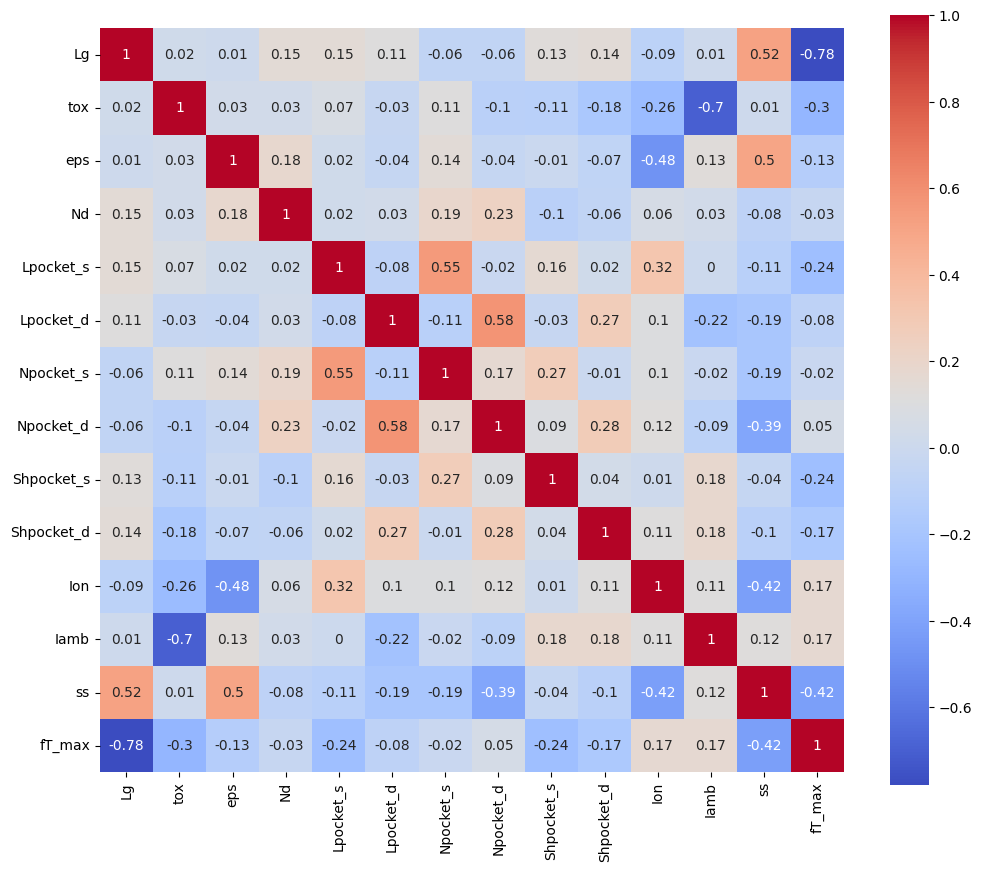

In [5]:
parameters = pd.concat([input_devices, output], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(parameters.corr().round(2), annot=True, cmap="coolwarm", square=True)

# Preprocessing (Normalization & Splitting)

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
transformed_data = scaler.fit_transform(input_devices)
transformed_data

array([[-1.70322343, -0.08142615,  1.26271654, ..., -2.13859546,
        -0.81609402, -0.85071173],
       [-1.40232062, -0.08142615,  1.26271654, ..., -2.13859546,
        -0.81609402, -0.85071173],
       [-1.10141782, -0.08142615,  1.26271654, ..., -2.13859546,
        -0.81609402, -0.85071173],
       ...,
       [ 0.70399902, -1.34290508,  1.26271654, ...,  0.56349441,
         1.35703956,  1.33559208],
       [ 0.70399902, -1.34290508,  1.26271654, ...,  0.75650083,
         1.35703956,  1.33559208],
       [ 0.70399902, -1.34290508,  1.26271654, ...,  0.94950725,
         1.35703956,  1.33559208]])

In [184]:
from sklearn.model_selection import train_test_split
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    # transformed_data,       #when using normalization
    input_devices,       #without normalization
    #  output_current,
    # output["Ion"]* 10**6,
    # output["Iamb"]* 10**5,
    # output["ss"]* 10**-2,
    output["fT_max"]* 10**-12,
    train_size=.8,
    random_state=42
)
X_train.shape

(805, 10)

# RandomForest

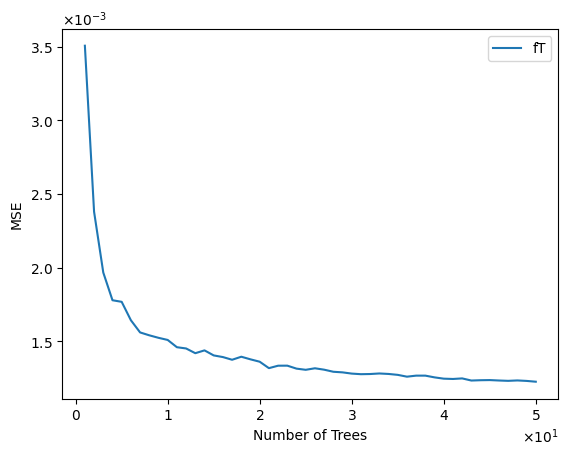

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

kf = KFold(n_splits=50, shuffle=True, random_state=42)

# Create a list of n_estimators values to try
n_estimators_values = range(1, 51)

# Create an empty list to store the MSE values
mse_values = []

# Iterate over the n_estimators values
for n_estimators in n_estimators_values:
    # Create a RandomForestRegressor object with the current number of trees
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Perform cross-validation and compute the MSE
    mse = -cross_val_score(rf, X_train, y_train, cv=15, scoring='neg_mean_squared_error')

    # Append the MSE value to the list
    mse_values.append(mse.mean())

plt.gca().ticklabel_format(style='sci', scilimits=(0,0), useMathText=True)
# Plot the n_estimators values against the MSE values
plt.plot(n_estimators_values, mse_values, label="fT")
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
# plt.title('Number of Trees vs. MSE')
plt.legend()
plt.show()


In [93]:
import pandas as pd
from google.colab import files
# Create a Pandas DataFrame from the mse_values list
df = pd.DataFrame(mse_values)

# Export the DataFrame to an Excel file
df.to_excel('mse_values.xlsx', index=False)

# Download the Excel file
files.download('mse_values.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate rf
rf = RandomForestRegressor(n_estimators=20,max_depth=15,
            random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
mse_rf = MSE(y_test,y_pred)
rmse_rf = mse_rf**(1/2)

# Print rmse_test
print("Test set MSE of rf: {:.5f}".format(mse_rf))
print("Test set RMSE of rf: {:.3f}".format(rmse_rf))

Test set MSE of rf: 0.00087
Test set RMSE of rf: 0.029


In [187]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2_score_rf = r2_score(y_test, y_pred)

# Print R^2 score
print("R^2 score:", r2_score_rf)

R^2 score: 0.9691294703107016


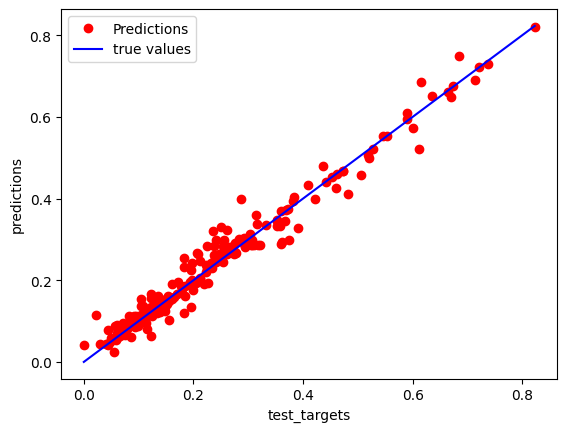

In [188]:
import matplotlib.pyplot as plt
yy=y_test
xx=y_pred
plt.plot( yy,xx,'ro', label='Predictions')

x = [min(yy), max(yy)]
plt.plot(x, x, color='blue', label='true values')

plt.xlabel("test_targets")
plt.ylabel("predictions")
plt.legend()
# plt.grid(True)
plt.show()

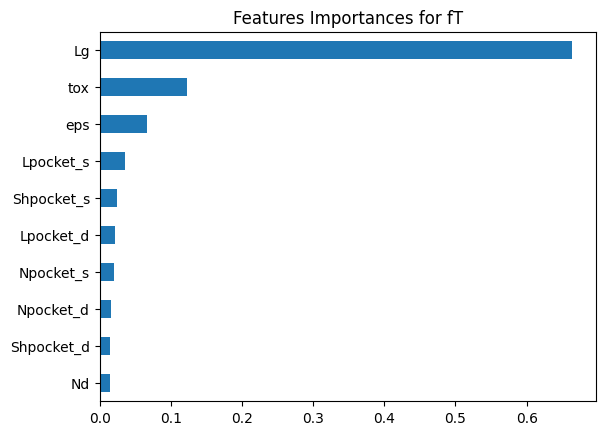

In [189]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh')
plt.title('Features Importances for fT')
# plt.legend()
plt.show()

Calculating the MSE with subsetting features

In [208]:
# Select the top n features according to their importance
selected_features = importances_sorted.index[-1:]

# Subset X_train using the selected features
X_train_subset = X_train[selected_features]
X_test_subset = X_test[selected_features]

# Print the selected features
print("Selected features:", selected_features)

# Print the shape of the subsetted X_train
print("Shape of subsetted X_train:", X_train_subset.shape)

Selected features: Index(['Lg'], dtype='object')
Shape of subsetted X_train: (805, 1)


In [209]:
# Fit rf to the training set
rf.fit(X_train_subset, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test_subset)

# Evaluate the test set RMSE
mse_rf = MSE(y_test,y_pred)
rmse_rf = mse_rf**(1/2)

# Print rmse_test
print("Test set MSE of rf: {:.5f}".format(mse_rf))
print("Test set RMSE of rf: {:.3f}".format(rmse_rf))

Test set MSE of rf: 0.01181
Test set RMSE of rf: 0.109


In [210]:
Ion_mse_features = [0.09387, 0.03488, 0.02493 , 0.01883, 0.01253, 0.00563, 0.00471, 0.00443, 0.00477, 0.00442]
Iamb_mse_features = [ 0.001239,  0.000687,  0.000289,  0.000153,  0.000084,  0.000069, 0.000051, 0.000039,  0.000042,0.00004]
SS_mse_features = [ 0.015916, 0.01084,0.00719 ,  0.00487, 0.00272, 0.00180, 0.00176 ,  0.00150, 0.00130, 0.00115]
fT_mse_features = [ 0.01181,0.00464, 0.00309, 0.00204 ,  0.00168,  0.00128 , 0.00127, 0.00125, 0.00099 ,0.00082]

# KNN

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
# Defining the hyperparameters to search
params = {
'n_neighbors': [5, 15, 25],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan']
}
# Performing GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=params, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


# Creating the final KNeighborsRegressor model with the best hyperparameters
final_knn_model = KNeighborsRegressor(**best_params)
#Training the model
final_knn_model.fit(X_train, y_train)
# Predicting the target variable on the test set
y_test_pred = final_knn_model.predict(X_test)
# Calculating the mean squared error
mse_knn = MSE(y_test, y_test_pred)
rmse_knn = mse_knn**(1/2)
r2_knn = r2_score(y_test, y_test_pred)
print("MSE: {:.5f}".format(mse_knn))
print("RMSE: {:.4f}".format(rmse_knn))
print("R2: {:.4f}".format(r2_knn))

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
MSE: 0.00155
RMSE: 0.0394
R2: 0.9448


# SVM

In [212]:
from sklearn import svm

svm_model = svm.SVR(kernel='rbf')
# Defining the hyperparameters to search
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}
# Performing GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_model, param_grid=params, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


# Creating the final svm model with the best hyperparameters
final_svm_model = svm.SVR(**best_params)
#Training the model
final_svm_model.fit(X_train, y_train)
# Predicting the target variable on the test set
y_test_pred = final_svm_model.predict(X_test)
# Calculating the mean squared error
mse_svm = MSE(y_test, y_test_pred)
rmse_svm = mse_svm**(1/2)
r2_svm = r2_score(y_test, y_test_pred)
print("MSE: {:.5f}".format(mse_svm))
print("RMSE: {:.4f}".format(rmse_svm))
print("R2: {:.4f}".format(r2_svm))

Best Hyperparameters: {'C': 1000, 'gamma': 0.001}
MSE: 0.00366
RMSE: 0.0605
R2: 0.8695


# Regression

In [213]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = linear_regression.predict(X_test)

# Print the results
mse_regression = MSE(y_test, y_pred)
rmse_regression = mse_regression**(1/2)
r2_regression = r2_score(y_test, y_pred)
print("MSE: {:.4f}".format(mse_regression))
print("RMSE: {:.4f}".format(rmse_regression))
print("R2: {:.4f}".format(r2_regression))

MSE: 0.0069
RMSE: 0.0832
R2: 0.7537


# Comparing Models

In [102]:
Ion_comparison = [0.0456, 0.0093, 0.0072, 0.00439]
Iamb_comparison = [0.0012, 0.00476, 0.00018, 0.00004]
ss_comparison = [0.0076, 0.00455, 0.00179, 0.00119]
fT_comparison = [0.0069, 0.00366, 0.00155, 0.00087]
models = ["Regression" , "SVM", "Knn", "RF"]

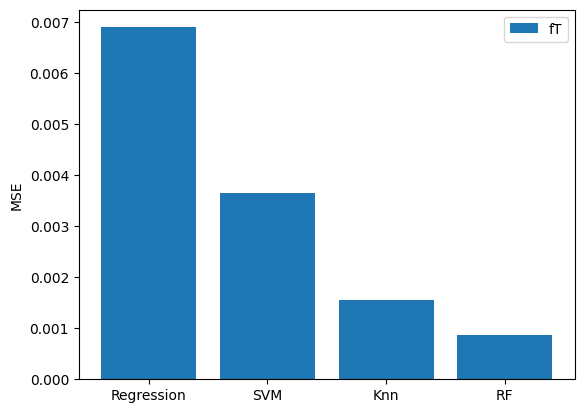

In [214]:
fig, ax = plt.subplots()

# Plot the data with bars
ax.bar(models, fT_comparison, label="fT", linewidth=2)

# Add labels and title
# ax.set_xlabel("Models")
ax.set_ylabel("MSE")
# ax.set_title("Comparison of MSE for Ion")

plt.legend()

# Show the plot
plt.show()
